In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [2]:
data=pd.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
data1=data
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Now we will check whether our dataset contains null values or not?

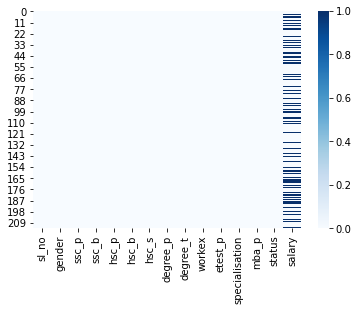

In [4]:
sns.heatmap(data1.isnull(),cmap='Blues')

Well salary column is missing and we have to predict whether placed or not so we need not to worry to fill out this missing data :) 

In [5]:
data1.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


As our model will only be able interpret numerical values so converting them all :)

In [6]:
a=pd.get_dummies(data1['gender'],drop_first=True)
data1=pd.concat([data1,a],axis=1)
data1=data1.rename(columns={'M':'Male or Female'})
data1

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Male or Female
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,1
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,1
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,1
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,1
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,0


We are doing above one by one as it will contains same name column which is difficult for our model to predict correct solutions :)


In [7]:
b=pd.get_dummies(data['ssc_b'],drop_first=True)
data1=pd.concat([data1,b],axis=1)
data1=data1.rename(columns={'Others':'Secondary Board'})
data1.head(1)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Male or Female,Secondary Board
0,1,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed,270000.0,1,1


In [8]:
c=pd.get_dummies(data['hsc_b'],drop_first=True)
data1=pd.concat([data1,c],axis=1)
data1=data1.rename(columns={'Others':'Higher Secondary Board'})
data1.head(1)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Male or Female,Secondary Board,Higher Secondary Board
0,1,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed,270000.0,1,1,1


In [9]:
d=pd.get_dummies(data['hsc_s'],drop_first=True)
data1=pd.concat([data1,d],axis=1)
e=pd.get_dummies(data['degree_t'],drop_first=True)
data1=pd.concat([data1,e],axis=1)
data1=data1.rename(columns={'Others':'Degree other'})
data1.head(1)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,mba_p,status,salary,Male or Female,Secondary Board,Higher Secondary Board,Commerce,Science,Degree other,Sci&Tech
0,1,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,...,58.8,Placed,270000.0,1,1,1,1,0,0,1


In [10]:
f=pd.get_dummies(data['workex'],drop_first=True)
g=pd.get_dummies(data['specialisation'],drop_first=True)
h=pd.get_dummies(data['status'],drop_first=True)
data1=pd.concat([data1,f,g,h],axis=1)
data1.head(1)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,Male or Female,Secondary Board,Higher Secondary Board,Commerce,Science,Degree other,Sci&Tech,Yes,Mkt&HR,Placed
0,1,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,...,1,1,1,1,0,0,1,0,1,1


Removing the catgorical columns's

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sl_no                   215 non-null    int64  
 1   gender                  215 non-null    object 
 2   ssc_p                   215 non-null    float64
 3   ssc_b                   215 non-null    object 
 4   hsc_p                   215 non-null    float64
 5   hsc_b                   215 non-null    object 
 6   hsc_s                   215 non-null    object 
 7   degree_p                215 non-null    float64
 8   degree_t                215 non-null    object 
 9   workex                  215 non-null    object 
 10  etest_p                 215 non-null    float64
 11  specialisation          215 non-null    object 
 12  mba_p                   215 non-null    float64
 13  status                  215 non-null    object 
 14  salary                  148 non-null    fl

In [12]:
data1.drop(['gender','workex','ssc_b','hsc_b','degree_t','status','specialisation','hsc_s','sl_no','salary'],axis=1,inplace=True)

In [13]:
data1.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,Male or Female,Secondary Board,Higher Secondary Board,Commerce,Science,Degree other,Sci&Tech,Yes,Mkt&HR,Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0,1


In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ssc_p                   215 non-null    float64
 1   hsc_p                   215 non-null    float64
 2   degree_p                215 non-null    float64
 3   etest_p                 215 non-null    float64
 4   mba_p                   215 non-null    float64
 5   Male or Female          215 non-null    uint8  
 6   Secondary Board         215 non-null    uint8  
 7   Higher Secondary Board  215 non-null    uint8  
 8   Commerce                215 non-null    uint8  
 9   Science                 215 non-null    uint8  
 10  Degree other            215 non-null    uint8  
 11  Sci&Tech                215 non-null    uint8  
 12  Yes                     215 non-null    uint8  
 13  Mkt&HR                  215 non-null    uint8  
 14  Placed                  215 non-null    ui

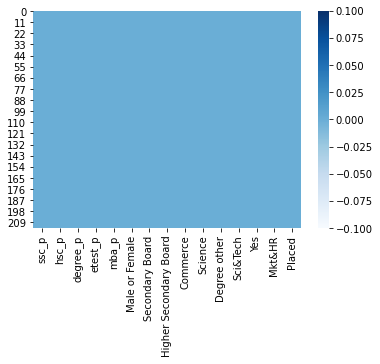

In [15]:
data1.dropna(inplace=True)
sns.heatmap(data1.isnull(),cmap='Blues')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [17]:
data1.dropna(inplace=True)
x=data1.drop('Placed',axis=1)
y=data1['Placed']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101,shuffle=True)

In [19]:
model=LogisticRegression()

In [20]:
model.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [21]:
result=model.predict(x_test)

In [22]:
print(confusion_matrix(y_test,result))

[[18  2]
 [ 5 40]]


In [23]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.95      0.89      0.92        45

    accuracy                           0.89        65
   macro avg       0.87      0.89      0.88        65
weighted avg       0.90      0.89      0.89        65



In [24]:
metrics.accuracy_score(result,y_test)

0.8923076923076924

**Bang we got a accuracy rate of 0.89 % well which is pretty good :)**

In [25]:
cor=data1.corr()

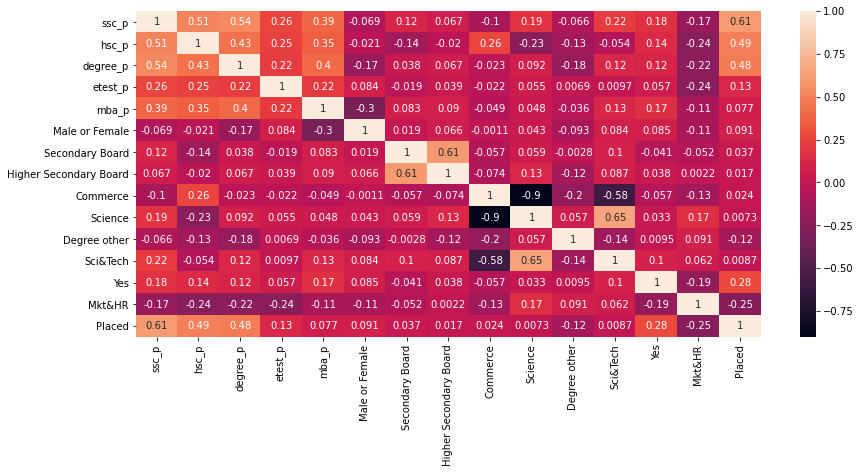

In [26]:
plt.figure(figsize=(14,6))
sns.heatmap(cor,annot=True)

From above correlation we can see which particular data seems benficial to us or which not above predictions we have by taking all the data avaliable and converting them into the required form :)

In [27]:
data1.drop(['Mkt&HR','Degree other'],axis=1,inplace=True)

In [28]:
x1=data1.drop('Placed',axis=1)
y1=data1['Placed']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=101,shuffle=True)

In [29]:
updated=LogisticRegression()

In [30]:
updated.fit(x1_test,y1_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [31]:
updated_result=updated.predict(x1_test)

In [32]:
print(classification_report(y1_test,updated_result))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.93      0.93      0.93        45

    accuracy                           0.91        65
   macro avg       0.89      0.89      0.89        65
weighted avg       0.91      0.91      0.91        65



In [33]:
print(confusion_matrix(y1_test,updated_result))

[[17  3]
 [ 3 42]]


In [34]:
metrics.accuracy_score(updated_result,y1_test)

0.9076923076923077

Well on removing the **negatively** correlated data we got a little higher accuracy froom the previous data :)